In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import glob
import matplotlib.image as mpimg
import keras
import time


import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd

from keras.layers import Dense, ZeroPadding2D, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Input, Lambda, Flatten, concatenate
from keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

In [127]:
my_path = '/content/drive/MyDrive/Petfinding/FaceVerification'

In [128]:
sample_path = my_path + '/Img/content/CutByV3'

In [129]:
%cd /content/drive/MyDrive/Petfinding/FaceVerification/

/content/drive/MyDrive/Petfinding/FaceVerification


In [6]:
!rm -R Img
!mkdir Img

In [7]:
!unzip /content/drive/MyDrive/Petfinding/FaceVerification/catface_croped.zip -d /content/drive/MyDrive/Petfinding/FaceVerification/Img

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/40f108d98-1.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/fb93de06f-3.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/98f5b7ecf-3.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/b751252cd-4.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/c4f05fe80-1.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/1a8fd6707-2.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/5ef34251f-4.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/a25a5ad9e-5.jpg  
  inflating: /content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/c2bb6a3be-3.jpg  
  inflating: /content/drive/MyD

In [130]:
df = pd.read_pickle("/content/drive/MyDrive/Petfinding/FaceVerification/df_final.pkl")
df1=df
df

,image,image_path,xmin,ymin,xmax,ymax,label,confidence,x_size,y_size,image_filter,id,id_filter
0,cf8e714b5-20.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,275,0,385,171,0,0.658163,640,480,1,cf8e714b5,1
1,8c2aae63b-1.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,82,34,222,194,0,0.990522,267,400,1,8c2aae63b,1
2,fa773690e-3.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,134,76,288,245,0,0.917266,360,480,1,fa773690e,1
3,0901cae3e-5.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,147,175,245,281,0,0.798057,360,480,1,0901cae3e,1
4,bba2fb084-1.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,0,9,195,210,0,0.989921,287,400,1,bba2fb084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,6c2d4467e-1.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,96,14,230,186,0,0.982711,400,267,1,6c2d4467e,1
14063,c9efae474-7.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,96,54,297,244,0,0.967412,351,400,1,c9efae474,1
14064,0907a14f3-4.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,121,117,199,213,0,0.757232,299,400,1,0907a14f3,1
14065,8afeab374-4.jpg,/content/sample_data/pet_find/TrainYourOwnYOLO...,97,23,246,168,0,0.937938,300,400,1,8afeab374,1


In [131]:
df['image_path'][0].split("/")[-1].split("-")[0]

'cf8e714b5'

In [132]:
df1['image_path'] = df1['image_path'].apply(lambda x: sample_path +'/'+ x.split("/")[-1])
df1['image'] = df1['image'].apply(lambda x: x.split("-")[0])
df1 = df1[['image', 'image_path']]
df1

,image,image_path
0,cf8e714b5,/content/drive/MyDrive/Petfinding/FaceVerifica...
1,8c2aae63b,/content/drive/MyDrive/Petfinding/FaceVerifica...
2,fa773690e,/content/drive/MyDrive/Petfinding/FaceVerifica...
3,0901cae3e,/content/drive/MyDrive/Petfinding/FaceVerifica...
4,bba2fb084,/content/drive/MyDrive/Petfinding/FaceVerifica...
...,...,...
14062,6c2d4467e,/content/drive/MyDrive/Petfinding/FaceVerifica...
14063,c9efae474,/content/drive/MyDrive/Petfinding/FaceVerifica...
14064,0907a14f3,/content/drive/MyDrive/Petfinding/FaceVerifica...
14065,8afeab374,/content/drive/MyDrive/Petfinding/FaceVerifica...


In [133]:
df1['image_path'][0]

'/content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/cf8e714b5-20.jpg'

In [134]:
def path_to_list(df):
    """ function to merge df into the name and path list format """
    paths = list(df['image_path'].values)
    count = len(paths)
    
    return pd.Series([count, paths], index=['count', 'image_path'])

In [135]:
def groupby_df(df):
  sample_df = df.groupby('image').apply(path_to_list).reset_index()
  return sample_df

#####label Train test dataset by random index

In [136]:
import random
random.seed(30)
sample_df = groupby_df(df1)
arr = np.arange(len(sample_df))
np.random.shuffle(arr)

arr_train = arr[:int(len(arr) * 0.7)] #first 70% of random index
arr_test = arr[int(len(arr) * 0.7):] #last 30% of random index
train_df = sample_df.iloc[arr_train].reset_index(drop = True)
test_df = sample_df.iloc[arr_test].reset_index(drop = True)

In [137]:
len(train_df), len(test_df)

(2128, 913)

In [138]:
train_df

,image,count,image_path
0,cce8fa6c2,3,[/content/drive/MyDrive/Petfinding/FaceVerific...
1,d8060a227,3,[/content/drive/MyDrive/Petfinding/FaceVerific...
2,bc4e5abfd,10,[/content/drive/MyDrive/Petfinding/FaceVerific...
3,e29f9a772,9,[/content/drive/MyDrive/Petfinding/FaceVerific...
4,fe41e15d5,3,[/content/drive/MyDrive/Petfinding/FaceVerific...
...,...,...,...
2123,45bec4a13,8,[/content/drive/MyDrive/Petfinding/FaceVerific...
2124,873996ad0,3,[/content/drive/MyDrive/Petfinding/FaceVerific...
2125,1d84ecb39,5,[/content/drive/MyDrive/Petfinding/FaceVerific...
2126,f22ff0f64,7,[/content/drive/MyDrive/Petfinding/FaceVerific...


In [139]:
train_df["image_path"][0]

['/content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/cce8fa6c2-3.jpg',
 '/content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/cce8fa6c2-2.jpg',
 '/content/drive/MyDrive/Petfinding/FaceVerification/Img/content/CutByV3/cce8fa6c2-1.jpg']

### Create Sample Pairs

For Train_df or Test_df
- For images from the same Pet:
    - Get all the combinations of pairs
    - Shuffle all pairs
    - Select top k/2 pairs
- For images from the different Pet:
  - Random Select two index
  - Given two index, get the random pair 
    - If this pair comes from the same PetId, or pair is duplicate, then resample a pair. (Step 1)
    - Repeat step 1, until condition fails"""

In [140]:
from sklearn.model_selection import train_test_split
from itertools import combinations 
import random

In [141]:
class sample_pairs():
  '''
  Input:
    - df (dataframe): dataframe contains columns name (PetID), count (Number of images for given Pet), Paths: image path for given Pet
    - k: Number of samples we want to take
    - ratio (float): class_weight (0,1] or the ratio between images from the same Pet and images from the different Pet. e.g. 1:3 -> ratio = 1/3  = 0.33
  Output:
    - Get samples (list of strings, list of binary integer): list sample paths and labels
  '''

  def __init__(self, df, ratio, k):
    self.df = df
    self.ratio = ratio
    self.k = k

  ### Get all files name from df
  def get_files_paths(self):
    all_files_path = []
    for path in self.df.image_path:
      all_files_path += path

    return all_files_path
  
  ### Get sample size for the two classes given the ratio, total sample size
  def get_sample_size(self):
    sample_different = int(self.k // (1 + self.ratio))
    sample_same = int(self.ratio * sample_different)
    return sample_different, sample_same


 ### Generate paris from the same PetID
  def sample_same_pairs(self):
     
    sample_different, sample_same = self.get_sample_size()
    sample = []
    for i in range(len(self.df)):
      tmp = self.df.loc[i, 'image_path'] 
      combs = list(combinations(tmp, 2))
      sample += combs
    if sample_same > len(sample):
      print('Sample size is too large. Please use a small smaple size')
      return None

    else:
      np.random.shuffle(sample)
      sample = sample[: sample_same]
      label_same = [0 for _ in range(len(sample))]
    return sample, label_same


### Generate paris from the different PetIDs
  def sample_different_pairs(self):
    sample_different, sample_same = self.get_sample_size()
    result, label_list = [], []
    array = self.get_files_paths()

    def random_pairs(array): 
      idx = random.sample(range(len(array)), 2)
      return idx

    idx = random_pairs(array)
    pair = (array[idx[0]], array[idx[1]])
    labels = [x.split('/')[-1].split('.')[0].split('-')[0] for x in pair]

    for i in range(sample_different):

     ### If the pair generator is already in our sample or the PetIDs are the same, then resample a pair 

      while (pair in result) or (labels[0] == labels[1]):
        idx = random_pairs(array)
        pair = (array[idx[0]], array[idx[1]])
        labels = [x.split('/')[-1].split('.')[0].split('-')[0] for x in pair]

      result.append(pair)
      label_list.append(1)
    return result, label_list


  def get_samples(self):
    sample, label_same = self.sample_same_pairs()
    result, label_list = self.sample_different_pairs()
    label_list = label_list + label_same
    result = result + sample

    ### Shuffle sample and randomly dropout 1% samples to add more randomness. 
    X_select, X_abandon, y_select, y_abandon = train_test_split(result, label_list, test_size=0.01, random_state=42)

    return X_select, y_select


In [142]:
X_train, y_train = sample_pairs(train_df, 1, 9846).get_samples()
X_test, y_test = sample_pairs(test_df, 1, 4221).get_samples()

In [143]:
len(X_train), len(y_train), len(X_test), len(y_test)

(9747, 9747, 4177, 4177)

### Test Sample Procedure

In [144]:
def test_unique_pairs(sample):
  if len(set(sample)) == len(sample):
    return True
  else:
    return False


def test_samples(X, labels):
  names = [x.split('/')[-1].split('.')[0].split('-')[0] for x in X]

  assert (names[0] == names[1] and labels == 0) or (names[0] != names[1] and labels == 1)


print('Whether the train sample pairs unique, ', test_unique_pairs(X_train))
print('Whether the test sample pairs unique, ', test_unique_pairs(X_test))


for i in range(len(X_train)):
  test_samples(X_train[i], y_train[i])

Whether the train sample pairs unique,  True
Whether the test sample pairs unique,  True


## Embedding and Classification

In [145]:
from sklearn import metrics
from sklearn.svm import SVC

In [146]:
class preprocessing():

  def __init__(self, path):
    self.path = path
  
  def read_all_file(self):
    # if type_ != '.jpg' and type_ != '.png':
    #   raise Exception("Sorry, we need files of image in .jpg or .png")

    txtfiles = []
    address = self.path + '/*' + '.jpg'
    for file in glob.glob(address):
      txtfiles.append(file)
    return txtfiles
  

  def get_petID(self):
    '''
    Input (list of string): filename with format: e.g. For 0fa6ba30b-1.jpg, 0fa6ba30b is the pet ID,  '1' is the number of image of given pet.
    Output: (list of string): list of PetIDs(labels)    
    '''
    txtfiles = self.read_all_file()
    names = [x.split('/')[-1].split('-')[0] for x in txtfiles]
    return names


  def get_image_name(self):
    '''
    Input (list of string): file path
    Output: (list of string): list of image names (labels)  e.g. 0fa6ba30b-1  
    '''
    txtfiles = self.read_all_file()
    image_path = [x.split('/')[-1].split('.')[0] for x in txtfiles]
    return image_path

def path_to_list(df):
    """ function to merge df into the name and path list format """
    paths = list(df['path'].values)
    count = len(paths)
    
    return pd.Series([count, paths], index=['count', 'paths'])

In [147]:
class Embedding():
  '''
  This method transform two pairs of images into embedding number 
  Input:
    - 
    - all_path(list of string): list of all images paths
    - embedding_model: use pretrained model as a tool of feature engineering
    - combine_type (string): combine two pairs of embedding features e.g. stack, calculate absoluate distance, or Chi-square distance
  Output:
    - Get samples (list of strings, list of binary integer): list sample paths and labels
  '''

  def __init__(self, all_path, embedding_model):

    self.all_path = all_path
    self.embedding_model = embedding_model

  def embedding_map(self):
    '''
    Embedding maps: use pretrained model as a tool of feature engineering
      - all_path(list of string): list of all images paths
      - output (dictionary of numpy array): embedding dictionary with image path as key and embeded matrix as value
    '''
    all_path = self.all_path
    embedding_model = self.embedding_model

    def embedding_image(path, embedding_model):
      '''
      mbedding: use pretrained model as a tool of feature engineering
  
      '''
      img = image.load_img(path, target_size= (260, 260))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis = 0)
      x = preprocess_input(x)
      features = embedding_model.predict(x)
      return features


    result = {}
    for path in all_path:
      result[path] = embedding_image(path, embedding_model)
    return result


  def convert_to_train(self, sample_data):

    image_map = self.embedding_map()
    result = []
    for x in sample_data:
      embed0 = image_map[x[0]]
      embed1 = image_map[x[1]]
      embed = np.concatenate((embed0, embed1), axis=1)
      result.append(embed)
    
    result = np.stack(result, axis=0)
    result = np.array(result).reshape(len(sample_data), -1)
    return result

  def get_embed_single(self, single_path):
    '''
    Get the embeding matrix for single image
    '''

    image_map = self.embedding_map()
    return image_map[single_path]

In [148]:
def embedding_map(all_path, embedding_model):
  '''
  Embedding maps: embed all images with VGG16
    - all_path(list of string): list of all images paths
    - output (dictionary of numpy array): embedding dictionary with image path as key and embeded matrix as value
  '''

  def embedding_image(path, embedding_model):
    '''
    vgg_embedding: use pretrained vgg16 as a tool of feature engineering
  
    '''
    img = image.load_img(path, target_size= (260, 260))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    features = embedding_model.predict(x)
    return features


  result = {}
  for path in all_path:
    result[path] = embedding_image(path, embedding_model)
  return result

def convert_to_train(image_map, X):
  
  result = []
  for x in X:
    embed0 = image_map[x[0]]
    embed1 = image_map[x[1]]
    embed = np.concatenate((embed0, embed1), axis=1)
    result.append(embed)
    
  result = np.stack(result, axis=0)
  result = np.array(result).reshape(len(X), -1)
  return result

### Embeded by EfficientNet

In [27]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D, GlobalAveragePooling2D, AveragePooling2D

base_EfficientNet = EfficientNetB2(weights='imagenet', pooling = 'max')
base_EfficientNet = Model(base_EfficientNet.input,base_EfficientNet.layers[-4].output)
base_EfficientNet.trainable = False
x = base_EfficientNet.output
x = AveragePooling2D(pool_size=(2, 2), strides= (1, 1), padding='valid')(x)
x = GlobalAveragePooling2D()(x)
norm_layer = Lambda(lambda x: K.l2_normalize(x, axis=1), name='norm_layer')(x)
EfficientNet = Model(inputs=base_EfficientNet.input, outputs=norm_layer)


In [28]:
data_preprocessing = preprocessing(sample_path)
files = data_preprocessing.read_all_file()
train_value_eff2 = Embedding(files, EfficientNet).convert_to_train(X_train)
test_value_eff2 = Embedding(files, EfficientNet).convert_to_train(X_test)

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(0.90)
train_value_eff2 = pca.fit_transform(train_value_eff2)
test_value_eff2 = pca.transform(test_value_eff2)

### Embedding by VGG16

In [29]:
def embedding_map(all_path, embedding_model):
  '''
  Embedding maps: embed all images with VGG16
    - all_path(list of string): list of all images paths
    - output (dictionary of numpy array): embedding dictionary with image path as key and embeded matrix as value
  '''

  def embedding_image(path, embedding_model):
    '''
    vgg_embedding: use pretrained vgg16 as a tool of feature engineering
  
    '''
    img = image.load_img(path, target_size= (224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    features = embedding_model.predict(x)
    return features


  result = {}
  for path in all_path:
    result[path] = embedding_image(path, embedding_model)
  return result

def convert_to_train(image_map, X):
  
  result = []
  for x in X:
    embed0 = image_map[x[0]]
    embed1 = image_map[x[1]]
    embed = np.concatenate((embed0, embed1), axis=1)
    result.append(embed)
    
  result = np.stack(result, axis=0)
  result = np.array(result).reshape(len(X), -1)
  return result

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D
vgg = VGG16(weights='imagenet')
vgg = Model(vgg.input,vgg.layers[-5].output)
vgg.trainable = False
x = vgg.output
# x = MaxPooling2D(pool_size=(2, 2), strides= (1, 1), padding='valid')(x)
x = GlobalAveragePooling2D()(x)
norm_layer = Lambda(lambda x: K.l2_normalize(x, axis=1), name='norm_layer')(x)
vgg = Model(inputs=vgg.input, outputs=norm_layer)

In [31]:
data_preprocessing = preprocessing(sample_path)
files = data_preprocessing.read_all_file()
image_map_vgg = embedding_map(files, vgg)
train_value_vgg = convert_to_train(image_map_vgg, X_train) #Embedding(files, vgg).convert_to_train(X_train)
test_value_vgg = convert_to_train(image_map_vgg, X_test) #Embedding(files, vgg).convert_to_train(X_test)


In [32]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(0.90)
train_value_vgg = pca.fit_transform(train_value_vgg)
test_value_vgg = pca.transform(test_value_vgg)

### Embeddig by Resnet

In [151]:
def embedding_map(all_path, embedding_model):
  '''
  Embedding maps: embed all images with VGG16
    - all_path(list of string): list of all images paths
    - output (dictionary of numpy array): embedding dictionary with image path as key and embeded matrix as value
  '''

  def embedding_image(path, embedding_model):
    '''
    vgg_embedding: use pretrained vgg16 as a tool of feature engineering
  
    '''
    img = image.load_img(path, target_size= (224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    features = embedding_model.predict(x)
    return features


  result = {}
  for path in all_path:
    result[path] = embedding_image(path, embedding_model)
  return result

def convert_to_train(image_map, X):
  
  result = []
  for x in X:
    embed0 = image_map[x[0]]
    embed1 = image_map[x[1]]
    embed = np.concatenate((embed0, embed1), axis=1)
    result.append(embed)
    
  result = np.stack(result, axis=0)
  result = np.array(result).reshape(len(X), -1)
  return result

In [152]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

base_Resnet = ResNet50(weights='imagenet')
# for layer in base_Resnet.layers:
#     layer.trainable = False
base_Resnet = Model(base_Resnet.input,base_Resnet.layers[-2].output)
base_Resnet.trainable = False
x = base_Resnet.output

norm_layer = Lambda(lambda x: K.l2_normalize(x, axis=1), name='norm_layer')(x)
ResNet = Model(inputs=base_Resnet.input, outputs=norm_layer)

In [153]:
image_map_resnet = embedding_map(files, ResNet)

In [154]:
train_value_resnet = convert_to_train(image_map_resnet, X_train)
test_value_resnet = convert_to_train(image_map_resnet, X_test)

In [155]:
pca = PCA(0.90)
train_value_resnet = pca.fit_transform(train_value_resnet)
test_value_resnet = pca.transform(test_value_resnet)

# Train the model

Usually it takes one hour to train the model with GPU


##SVM

##### Eff + SVM

In [37]:
svc = SVC(probability=True)
pred = svc.fit(train_value_eff2, y_train).predict_proba(test_value_eff2)

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("auc of Eff+SVM:")
metrics.auc(fpr, tpr)

auc of Eff+SVM:


0.8889138783887138

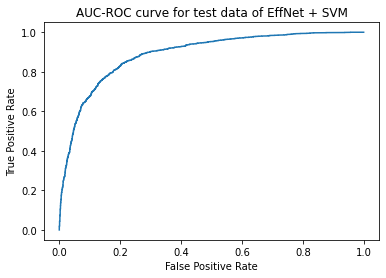

In [39]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of EffNet + SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC score for traning dataset

In [40]:
pred2 = svc.predict_proba(train_value_eff2)

In [41]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of Eff+SVM:")
metrics.auc(fpr2, tpr2)

train auc of Eff+SVM:


0.9845082535886276

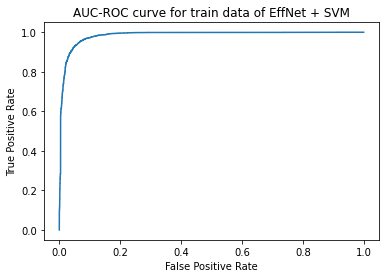

In [42]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of EffNet + SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [43]:
from joblib import dump, load
dump(pca, my_path+'/output(SVM_eff)'+ '/pca_model.joblib') 
dump(svc, my_path+'/output(SVM_eff)'+ '/svm_model.joblib')

np.save(my_path +'/output(SVM_eff)'+ '/train_value_eff_svm', train_value_eff2) 
np.save(my_path +'/output(SVM_eff)'+ '/test_value_eff_svm', test_value_eff2)
np.save(my_path +'/output(SVM_eff)'+ '/y_train_eff_svm', y_train) 
np.save(my_path +'/output(SVM_eff)'+ '/y_test_eff_svm', y_test)

np.save(my_path +'/output(SVM_eff)'+ '/test_fpr_eff_svm', fpr) 
np.save(my_path +'/output(SVM_eff)'+ '/test_tpr_eff_svm', tpr)
np.save(my_path +'/output(SVM_eff)'+ '/test_pred_eff_svm', pred)
np.save(my_path +'/output(SVM_eff)'+ '/train_fpr_eff_svm', fpr2) 
np.save(my_path +'/output(SVM_eff)'+ '/train_tpr_eff_svm', tpr2)
np.save(my_path +'/output(SVM_eff)'+ '/train_pred_eff_svm', pred2)

np.save(my_path +'/output(SVM_eff)' + '/X_train_eff_svm', X_train)
np.save(my_path +'/output(SVM_eff)'+ '/X_test_eff_svm', X_test)
test_df.to_csv(my_path +'/output(SVM_eff)' + '/test_df_eff_svm.csv')
train_df.to_csv(my_path +'/output(SVM_eff)' + '/train_df_eff_svm.csv')

##### VGG + SVM

In [44]:
svc = SVC(probability=True)
pred = svc.fit(train_value_vgg, y_train).predict_proba(test_value_vgg)

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of VGG+SVM:")
metrics.auc(fpr, tpr)

test auc of VGG+SVM:


0.8596502570479561

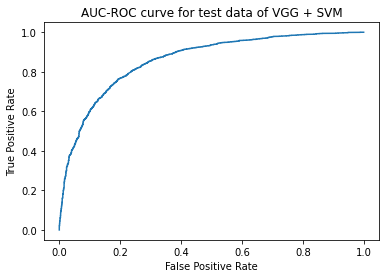

In [46]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of VGG + SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC score for traning dataset

In [47]:
pred2 = svc.predict_proba(train_value_vgg)

In [48]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of VGG+SVM:")
metrics.auc(fpr2, tpr2)

train auc of VGG+SVM:


0.9817734847565591

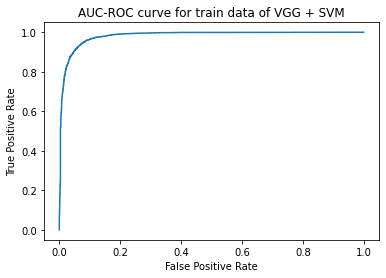

In [49]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of VGG + SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [50]:
from joblib import dump, load
dump(pca, my_path+'/output(SVM_vgg)'+ '/pca_model.joblib') 
dump(svc, my_path+'/output(SVM_vgg)'+ '/svm_model.joblib')

np.save(my_path +'/output(SVM_vgg)'+ '/train_value_vgg_svm', train_value_vgg) 
np.save(my_path +'/output(SVM_vgg)'+ '/test_value_vgg_svm', test_value_vgg)
np.save(my_path +'/output(SVM_vgg)'+ '/y_train_vgg_svm', y_train) 
np.save(my_path +'/output(SVM_vgg)'+ '/y_test_vgg_svm', y_test)

np.save(my_path +'/output(SVM_vgg)'+ '/test_fpr_vgg_svm', fpr) 
np.save(my_path +'/output(SVM_vgg)'+ '/test_tpr_vgg_svm', tpr)
np.save(my_path +'/output(SVM_vgg)'+ '/test_pred_vgg_svm', pred)
np.save(my_path +'/output(SVM_vgg)'+ '/train_fpr_vgg_svm', fpr2) 
np.save(my_path +'/output(SVM_vgg)'+ '/train_tpr_vgg_svm', tpr2)
np.save(my_path +'/output(SVM_vgg)'+ '/train_pred_vgg_svm', pred2)

np.save(my_path +'/output(SVM_vgg)' + '/X_train_vgg_svm', X_train)
np.save(my_path +'/output(SVM_vgg)'+ '/X_test_vgg_svm', X_test)
test_df.to_csv(my_path +'/output(SVM_vgg)' + '/test_df_vgg_svm.csv')
train_df.to_csv(my_path +'/output(SVM_vgg)' + '/train_df_vgg_svm.csv')

##### resnet + SVM

In [51]:
svc = SVC(probability=True)
pred = svc.fit(train_value_resnet, y_train).predict_proba(test_value_resnet)

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of resnet+SVM:")
metrics.auc(fpr, tpr)

test auc of resnet+SVM:


0.874077222598211

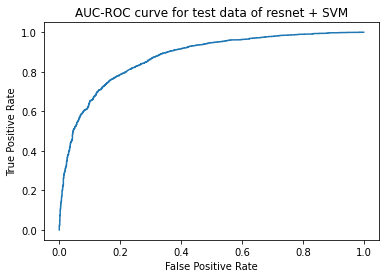

In [53]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of resnet + SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC score for traning dataset

In [54]:
pred2 = svc.predict_proba(train_value_resnet)

In [55]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of resnet+SVM:")
metrics.auc(fpr2, tpr2)

train auc of resnet+SVM:


0.9907217809168641

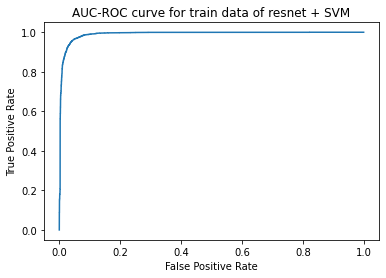

In [56]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of resnet + SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [57]:
from joblib import dump, load
dump(pca, my_path+'/output(SVM_resnet)'+ '/pca_model.joblib') 
dump(svc, my_path+'/output(SVM_resnet)'+ '/svm_model.joblib')

np.save(my_path +'/output(SVM_resnet)'+ '/train_value_resnet_svm', train_value_resnet) 
np.save(my_path +'/output(SVM_resnet)'+ '/test_value_resnet_svm', test_value_resnet)
np.save(my_path +'/output(SVM_resnet)'+ '/y_train_resnet_svm', y_train) 
np.save(my_path +'/output(SVM_resnet)'+ '/y_test_resnet_svm', y_test)

np.save(my_path +'/output(SVM_resnet)'+ '/test_fpr_resnet_svm', fpr) 
np.save(my_path +'/output(SVM_resnet)'+ '/test_tpr_resnet_svm', tpr)
np.save(my_path +'/output(SVM_resnet)'+ '/test_pred_resnet_svm', pred)
np.save(my_path +'/output(SVM_resnet)'+ '/train_fpr_resnet_svm', fpr2) 
np.save(my_path +'/output(SVM_resnet)'+ '/train_tpr_resnet_svm', tpr2)
np.save(my_path +'/output(SVM_resnet)'+ '/train_pred_resnet_svm', pred2)

np.save(my_path +'/output(SVM_resnet)' + '/X_train_resnet_svm', X_train)
np.save(my_path +'/output(SVM_resnet)'+ '/X_test_resnet_svm', X_test)
test_df.to_csv(my_path +'/output(SVM_resnet)' + '/test_df_resnet_svm.csv')
train_df.to_csv(my_path +'/output(SVM_resnet)' + '/train_df_resnet_svm.csv')

## Logistic Regression

##### Log+Eff2

In [58]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', penalty = 'l2', C = 10, n_jobs = -1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr, train_value_eff2, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC of Log+Eff2: %.3f' % mean(scores))

Mean ROC AUC of Log+Eff2: 0.550


In [59]:
from sklearn import metrics
pred = lr.fit(train_value_eff2, y_train).predict_proba(test_value_eff2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test ROC AUC of Log+Eff2:")
metrics.auc(fpr, tpr)

test ROC AUC of Log+Eff2:


0.4926805984274497

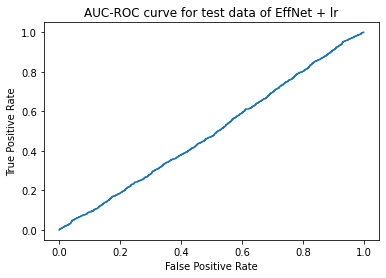

In [60]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of EffNet + lr')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
pred2 = lr.predict_proba(train_value_eff2)

In [62]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of lr+eff2:")
metrics.auc(fpr2, tpr2)

train auc of lr+eff2:


0.6613390879256378

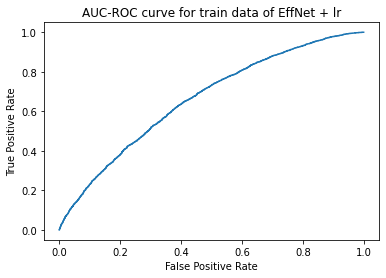

In [63]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of EffNet + lr')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
from joblib import dump, load
dump(pca, my_path+'/output(lr_eff)'+ '/pca_model.joblib') 
dump(lr, my_path+'/output(lr_eff)'+ '/lr_model.joblib')

np.save(my_path +'/output(lr_eff)'+ '/train_value_eff_lr', train_value_eff2) 
np.save(my_path +'/output(lr_eff)'+ '/test_value_eff_lr', test_value_eff2)
np.save(my_path +'/output(lr_eff)'+ '/y_train_eff_lr', y_train) 
np.save(my_path +'/output(lr_eff)'+ '/y_test_eff_lr', y_test)

np.save(my_path +'/output(lr_eff)'+ '/test_fpr_eff_lr', fpr) 
np.save(my_path +'/output(lr_eff)'+ '/test_tpr_eff_lr', tpr)
np.save(my_path +'/output(lr_eff)'+ '/test_pred_eff_lr', pred)
np.save(my_path +'/output(lr_eff)'+ '/train_fpr_eff_lr', fpr2) 
np.save(my_path +'/output(lr_eff)'+ '/train_tpr_eff_lr', tpr2)
np.save(my_path +'/output(lr_eff)'+ '/train_pred_eff_lr', pred2)

np.save(my_path +'/output(lr_eff)' + '/X_train_eff_lr', X_train)
np.save(my_path +'/output(lr_eff)'+ '/X_test_eff_lr', X_test)
test_df.to_csv(my_path +'/output(lr_eff)' + '/test_df_eff_lr.csv')
train_df.to_csv(my_path +'/output(lr_eff)' + '/train_df_eff_lr.csv')

##### Log+VGG

In [65]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', penalty = 'l2', C = 10, n_jobs = -1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr, train_value_vgg, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC of Log+Eff2: %.3f' % mean(scores))

Mean ROC AUC of Log+Eff2: 0.555


In [66]:
from sklearn import metrics
pred = lr.fit(train_value_vgg, y_train).predict_proba(test_value_vgg)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test ROC AUC of Log+vgg:")
metrics.auc(fpr, tpr)

test ROC AUC of Log+vgg:


0.5090306091568864

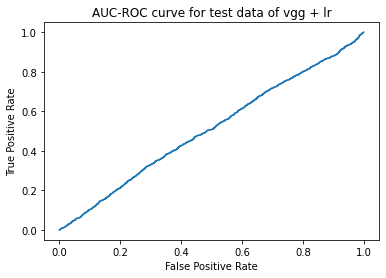

In [67]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of vgg + lr')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
pred2 = lr.predict_proba(train_value_vgg)

In [69]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of lr+vgg:")
metrics.auc(fpr2, tpr2)

train auc of lr+vgg:


0.6331117314545298

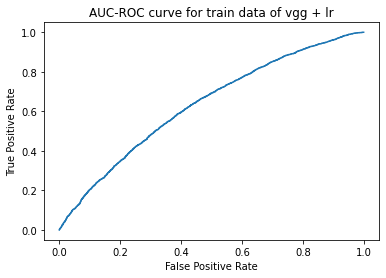

In [70]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of vgg + lr')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
from joblib import dump, load
dump(pca, my_path+'/output(lr_vgg)'+ '/pca_model.joblib') 
dump(lr, my_path+'/output(lr_vgg)'+ '/lr_model.joblib')

np.save(my_path +'/output(lr_vgg)'+ '/train_value_vgg_lr', train_value_vgg) 
np.save(my_path +'/output(lr_vgg)'+ '/test_value_vgg_lr', test_value_vgg)
np.save(my_path +'/output(lr_vgg)'+ '/y_train_vgg_lr', y_train) 
np.save(my_path +'/output(lr_vgg)'+ '/y_test_vgg_lr', y_test)

np.save(my_path +'/output(lr_vgg)'+ '/test_fpr_vgg_lr', fpr) 
np.save(my_path +'/output(lr_vgg)'+ '/test_tpr_vgg_lr', tpr)
np.save(my_path +'/output(lr_vgg)'+ '/test_pred_vgg_lr', pred)
np.save(my_path +'/output(lr_vgg)'+ '/train_fpr_vgg_lr', fpr2) 
np.save(my_path +'/output(lr_vgg)'+ '/train_tpr_vgg_lr', tpr2)
np.save(my_path +'/output(lr_vgg)'+ '/train_pred_vgg_lr', pred2)

np.save(my_path +'/output(lr_vgg)' + '/X_train_vgg_lr', X_train)
np.save(my_path +'/output(lr_vgg)'+ '/X_test_vgg_lr', X_test)
test_df.to_csv(my_path +'/output(lr_vgg)' + '/test_df_vgg_lr.csv')
train_df.to_csv(my_path +'/output(lr_vgg)' + '/train_df_vgg_lr.csv')

##### Log+resnet

In [72]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', penalty = 'l2', C = 10, n_jobs = -1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr, train_value_resnet, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC of Log+Eff2: %.3f' % mean(scores))

Mean ROC AUC of Log+Eff2: 0.562


In [73]:
from sklearn import metrics
pred = lr.fit(train_value_resnet, y_train).predict_proba(test_value_resnet)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test ROC AUC of Log+resnet:")
metrics.auc(fpr, tpr)

test ROC AUC of Log+resnet:


0.5014801120263228

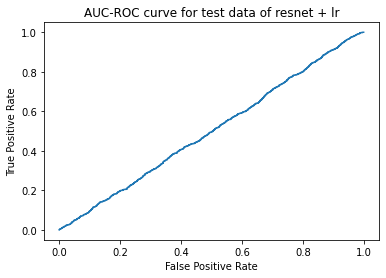

In [74]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of resnet + lr')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
pred2 = lr.predict_proba(train_value_resnet)

In [76]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of lr+resnet:")
metrics.auc(fpr2, tpr2)

train auc of lr+resnet:


0.6820998541451009

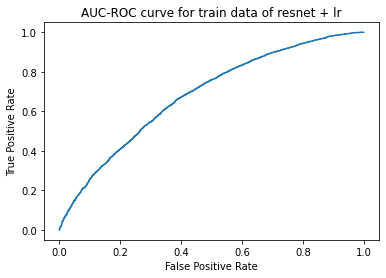

In [77]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of resnet + lr')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
from joblib import dump, load
dump(pca, my_path+'/output(lr_resnet)'+ '/pca_model.joblib') 
dump(lr, my_path+'/output(lr_resnet)'+ '/lr_model.joblib')

np.save(my_path +'/output(lr_resnet)'+ '/train_value_resnet_lr', train_value_resnet) 
np.save(my_path +'/output(lr_resnet)'+ '/test_value_resnet_lr', test_value_resnet)
np.save(my_path +'/output(lr_resnet)'+ '/y_train_resnet_lr', y_train) 
np.save(my_path +'/output(lr_resnet)'+ '/y_test_resnet_lr', y_test)

np.save(my_path +'/output(lr_resnet)'+ '/test_fpr_resnet_lr', fpr) 
np.save(my_path +'/output(lr_resnet)'+ '/test_tpr_resnet_lr', tpr)
np.save(my_path +'/output(lr_resnet)'+ '/test_pred_resnet_lr', pred)
np.save(my_path +'/output(lr_resnet)'+ '/train_fpr_resnet_lr', fpr2) 
np.save(my_path +'/output(lr_resnet)'+ '/train_tpr_resnet_lr', tpr2)
np.save(my_path +'/output(lr_resnet)'+ '/train_pred_resnet_lr', pred2)

np.save(my_path +'/output(lr_resnet)' + '/X_train_resnet_lr', X_train)
np.save(my_path +'/output(lr_resnet)'+ '/X_test_resnet_lr', X_test)
test_df.to_csv(my_path +'/output(lr_resnet)' + '/test_df_resnet_lr.csv')
train_df.to_csv(my_path +'/output(lr_resnet)' + '/train_df_resnet_lr.csv')

## Xgboost

##### xgboost + eff2

In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(val_metric = 'auc', n_estimator = 200)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, train_value_eff2, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.855


In [80]:
xgb = XGBClassifier(val_metric = 'auc', n_estimator = 200)
pred = xgb.fit(train_value_eff2, y_train).predict_proba(test_value_eff2)

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of Eff2 +XGB:")
metrics.auc(fpr, tpr)

test auc of Eff2 +XGB:


0.8597919406341188

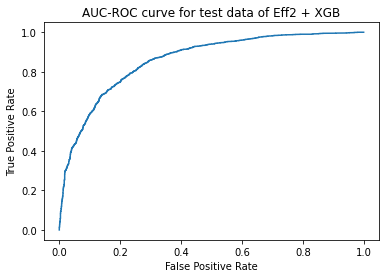

In [82]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of Eff2 + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
pred2 = xgb.predict_proba(train_value_eff2)

In [84]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of Eff2 + XGB:")
metrics.auc(fpr2, tpr2)

train auc of Eff2 + XGB:


0.9087286506901898

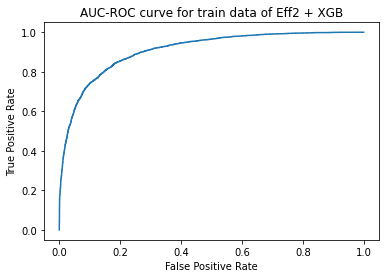

In [85]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of Eff2 + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [86]:
from joblib import dump, load
dump(pca, my_path+'/output(XGB_eff)'+ '/pca_model.joblib') 
dump(xgb, my_path+'/output(XGB_eff)'+ '/xgb_model.joblib')

np.save(my_path +'/output(XGB_eff)'+ '/train_value_eff_XGB', train_value_eff2) 
np.save(my_path +'/output(XGB_eff)'+ '/test_value_eff_XGB', test_value_eff2)
np.save(my_path +'/output(XGB_eff)'+ '/y_train_eff_XGB', y_train) 
np.save(my_path +'/output(XGB_eff)'+ '/y_test_eff_XGB', y_test)

np.save(my_path +'/output(XGB_eff)'+ '/test_fpr_eff_XGB', fpr) 
np.save(my_path +'/output(XGB_eff)'+ '/test_tpr_eff_XGB', tpr)
np.save(my_path +'/output(XGB_eff)'+ '/test_pred_eff_XGB', pred)
np.save(my_path +'/output(XGB_eff)'+ '/train_fpr_eff_XGB', fpr2) 
np.save(my_path +'/output(XGB_eff)'+ '/train_tpr_eff_XGB', tpr2)
np.save(my_path +'/output(XGB_eff)'+ '/train_pred_eff_XGB', pred2)

np.save(my_path +'/output(XGB_eff)' + '/X_train_eff_XGB', X_train)
np.save(my_path +'/output(XGB_eff)'+ '/X_test_eff_XGB', X_test)
test_df.to_csv(my_path +'/output(XGB_eff)' + '/test_df_eff_XGB.csv')
train_df.to_csv(my_path +'/output(XGB_eff)' + '/train_df_eff_XGB.csv')

##### xgboost + VGG

In [87]:
from xgboost import XGBClassifier

xgb = XGBClassifier(val_metric = 'auc', n_estimator = 200)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, train_value_vgg, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.819


In [88]:
xgb = XGBClassifier(val_metric = 'auc', n_estimator = 200)
pred = xgb.fit(train_value_vgg, y_train).predict_proba(test_value_vgg)

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of vgg +XGB:")
metrics.auc(fpr, tpr)

test auc of vgg +XGB:


0.8151847664009066

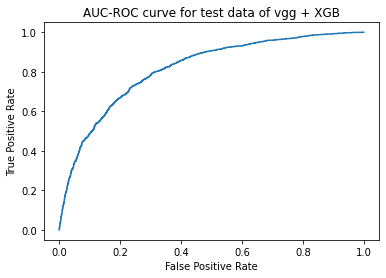

In [90]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of vgg + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
pred2 = xgb.predict_proba(train_value_vgg)

In [92]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of vgg + XGB:")
metrics.auc(fpr2, tpr2)

train auc of vgg + XGB:


0.8862598512685907

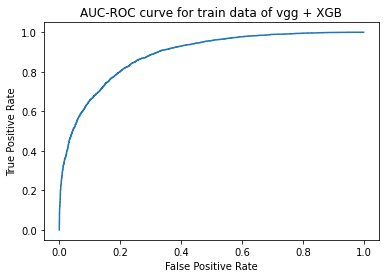

In [93]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of vgg + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [94]:
from joblib import dump, load
dump(pca, my_path+'/output(XGB_vgg)'+ '/pca_model.joblib') 
dump(xgb, my_path+'/output(XGB_vgg)'+ '/xgb_model.joblib')

np.save(my_path +'/output(XGB_vgg)'+ '/train_value_vgg_XGB', train_value_vgg) 
np.save(my_path +'/output(XGB_vgg)'+ '/test_value_vgg_XGB', test_value_vgg)
np.save(my_path +'/output(XGB_vgg)'+ '/y_train_vgg_XGB', y_train) 
np.save(my_path +'/output(XGB_vgg)'+ '/y_test_vgg_XGB', y_test)

np.save(my_path +'/output(XGB_vgg)'+ '/test_fpr_vgg_XGB', fpr) 
np.save(my_path +'/output(XGB_vgg)'+ '/test_tpr_vgg_XGB', tpr)
np.save(my_path +'/output(XGB_vgg)'+ '/test_pred_vgg_XGB', pred)
np.save(my_path +'/output(XGB_vgg)'+ '/train_fpr_vgg_XGB', fpr2) 
np.save(my_path +'/output(XGB_vgg)'+ '/train_tpr_vgg_XGB', tpr2)
np.save(my_path +'/output(XGB_vgg)'+ '/train_pred_vgg_XGB', pred2)

np.save(my_path +'/output(XGB_vgg)' + '/X_train_vgg_XGB', X_train)
np.save(my_path +'/output(XGB_vgg)'+ '/X_test_vgg_XGB', X_test)
test_df.to_csv(my_path +'/output(XGB_vgg)' + '/test_df_vgg_XGB.csv')
train_df.to_csv(my_path +'/output(XGB_vgg)' + '/train_df_vgg_XGB.csv')

##### xgboost + resnet

In [95]:
from xgboost import XGBClassifier

xgb = XGBClassifier(val_metric = 'auc', n_estimator = 200)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, train_value_resnet, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.844


In [96]:
xgb = XGBClassifier(val_metric = 'auc', n_estimator = 200)
pred = xgb.fit(train_value_resnet, y_train).predict_proba(test_value_resnet)

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of resnet +XGB:")
metrics.auc(fpr, tpr)

test auc of resnet +XGB:


0.8426905254489399

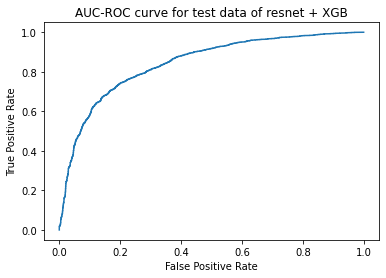

In [98]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of resnet + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
pred2 = xgb.predict_proba(train_value_resnet)

In [100]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of resnet + XGB:")
metrics.auc(fpr2, tpr2)

train auc of resnet + XGB:


0.9066154345825073

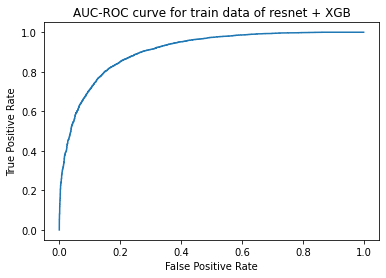

In [101]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of resnet + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [102]:
from joblib import dump, load
dump(pca, my_path+'/output(XGB_resnet)'+ '/pca_model.joblib') 
dump(xgb, my_path+'/output(XGB_resnet)'+ '/xgb_model.joblib')

np.save(my_path +'/output(XGB_resnet)'+ '/train_value_resnet_XGB', train_value_resnet) 
np.save(my_path +'/output(XGB_resnet)'+ '/test_value_resnet_XGB', test_value_resnet)
np.save(my_path +'/output(XGB_resnet)'+ '/y_train_resnet_XGB', y_train) 
np.save(my_path +'/output(XGB_resnet)'+ '/y_test_resnet_XGB', y_test)

np.save(my_path +'/output(XGB_resnet)'+ '/test_fpr_resnet_XGB', fpr) 
np.save(my_path +'/output(XGB_resnet)'+ '/test_tpr_resnet_XGB', tpr)
np.save(my_path +'/output(XGB_resnet)'+ '/test_pred_resnet_XGB', pred)
np.save(my_path +'/output(XGB_resnet)'+ '/train_fpr_resnet_XGB', fpr2) 
np.save(my_path +'/output(XGB_resnet)'+ '/train_tpr_resnet_XGB', tpr2)
np.save(my_path +'/output(XGB_resnet)'+ '/train_pred_resnet_XGB', pred2)

np.save(my_path +'/output(XGB_resnet)' + '/X_train_resnet_XGB', X_train)
np.save(my_path +'/output(XGB_resnet)'+ '/X_test_resnet_XGB', X_test)
test_df.to_csv(my_path +'/output(XGB_resnet)' + '/test_df_resnet_XGB.csv')
train_df.to_csv(my_path +'/output(XGB_resnet)' + '/train_df_resnet_XGB.csv')

## Random Forest

#### Random Forest + eff2

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, train_value_eff2, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.855


In [104]:
rf = RandomForestClassifier(n_estimators = 200)
pred = rf.fit(train_value_eff2, y_train).predict_proba(test_value_eff2)

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of Eff2 + Random Forest:")
metrics.auc(fpr, tpr)

test auc of Eff2 + Random Forest:


0.8464210680282963

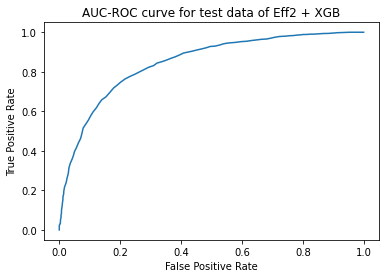

In [106]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of Eff2 + Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
pred2 = rf.predict_proba(train_value_eff2)

In [108]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of Eff2 + Random Forest:")
metrics.auc(fpr2, tpr2)

train auc of Eff2 + Random Forest:


1.0

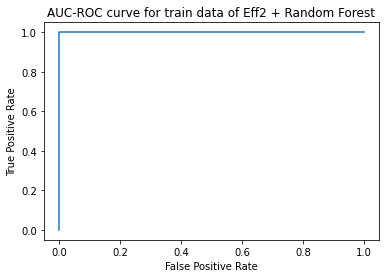

In [109]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of Eff2 + Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [110]:
from joblib import dump, load
dump(pca, my_path+'/output(RF_eff)'+ '/pca_model.joblib') 
dump(rf, my_path+'/output(RF_eff)'+ '/rf_model.joblib')

np.save(my_path +'/output(RF_eff)'+ '/train_value_eff_RF', train_value_eff2) 
np.save(my_path +'/output(RF_eff)'+ '/test_value_eff_RF', test_value_eff2)
np.save(my_path +'/output(RF_eff)'+ '/y_train_eff_RF', y_train) 
np.save(my_path +'/output(RF_eff)'+ '/y_test_eff_RF', y_test)

np.save(my_path +'/output(RF_eff)'+ '/test_fpr_eff_RF', fpr) 
np.save(my_path +'/output(RF_eff)'+ '/test_tpr_eff_RF', tpr)
np.save(my_path +'/output(RF_eff)'+ '/test_pred_eff_RF', pred)
np.save(my_path +'/output(RF_eff)'+ '/train_fpr_eff_RF', fpr2) 
np.save(my_path +'/output(RF_eff)'+ '/train_tpr_eff_RF', tpr2)
np.save(my_path +'/output(RF_eff)'+ '/train_pred_eff_RF', pred2)

np.save(my_path +'/output(RF_eff)' + '/X_train_eff_RF', X_train)
np.save(my_path +'/output(RF_eff)'+ '/X_test_eff_RF', X_test)
test_df.to_csv(my_path +'/output(RF_eff)' + '/test_df_eff_RF.csv')
train_df.to_csv(my_path +'/output(RF_eff)' + '/train_df_eff_RF.csv')

#### Random Forest + VGG

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, train_value_vgg, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.831


In [112]:
rf = RandomForestClassifier(n_estimators = 200)
pred = rf.fit(train_value_vgg, y_train).predict_proba(test_value_vgg)

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of vgg + Random Forest:")
metrics.auc(fpr, tpr)

test auc of vgg + Random Forest:


0.8063498319054928

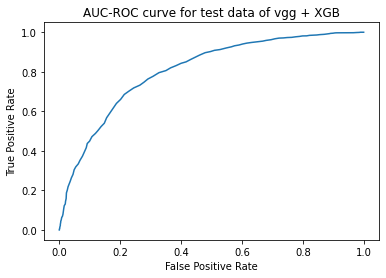

In [114]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of vgg + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
pred2 = rf.predict_proba(train_value_vgg)

In [116]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of vgg + Random Forest:")
metrics.auc(fpr2, tpr2)

train auc of vgg + Random Forest:


1.0

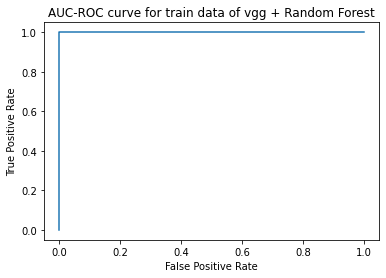

In [117]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of vgg + Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [118]:
from joblib import dump, load
dump(pca, my_path+'/output(RF_vgg)'+ '/pca_model.joblib') 
dump(rf, my_path+'/output(RF_vgg)'+ '/rf_model.joblib')

np.save(my_path +'/output(RF_vgg)'+ '/train_value_vgg_RF', train_value_eff2) 
np.save(my_path +'/output(RF_vgg)'+ '/test_value_vgg_RF', test_value_eff2)
np.save(my_path +'/output(RF_vgg)'+ '/y_train_vgg_RF', y_train) 
np.save(my_path +'/output(RF_vgg)'+ '/y_test_vgg_RF', y_test)

np.save(my_path +'/output(RF_vgg)'+ '/test_fpr_vgg_RF', fpr) 
np.save(my_path +'/output(RF_vgg)'+ '/test_tpr_vgg_RF', tpr)
np.save(my_path +'/output(RF_vgg)'+ '/test_pred_vgg_RF', pred)
np.save(my_path +'/output(RF_vgg)'+ '/train_fpr_vgg_RF', fpr2) 
np.save(my_path +'/output(RF_vgg)'+ '/train_tpr_vgg_RF', tpr2)
np.save(my_path +'/output(RF_vgg)'+ '/train_pred_vgg_RF', pred2)

np.save(my_path +'/output(RF_vgg)' + '/X_train_vgg_RF', X_train)
np.save(my_path +'/output(RF_vgg)'+ '/X_test_vgg_RF', X_test)
test_df.to_csv(my_path +'/output(RF_vgg)' + '/test_df_vgg_RF.csv')
train_df.to_csv(my_path +'/output(RF_vgg)' + '/train_df_vgg_RF.csv')

#### Random Forest + resnet

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, train_value_resnet, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.826


In [157]:
rf = RandomForestClassifier(n_estimators = 200)
pred = rf.fit(train_value_resnet, y_train).predict_proba(test_value_resnet)

In [158]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
print("test auc of resnet + Random Forest:")
metrics.auc(fpr, tpr)

test auc of resnet + Random Forest:


0.7978848107859267

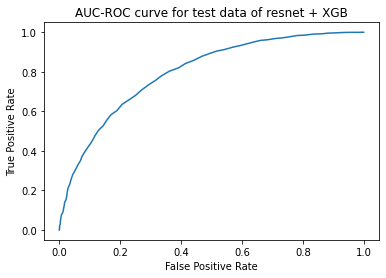

In [159]:
#create ROC curve
plt.plot(fpr,tpr)
plt.title('AUC-ROC curve for test data of resnet + XGB')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
pred2 = rf.predict_proba(train_value_resnet)

In [161]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_train, pred2[:,1])
print("train auc of resnet + Random Forest:")
metrics.auc(fpr2, tpr2)

train auc of resnet + Random Forest:


1.0

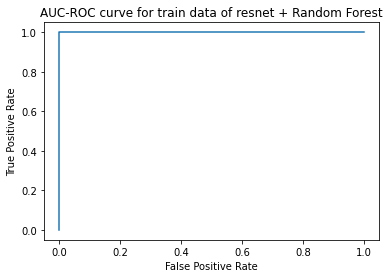

In [162]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.title('AUC-ROC curve for train data of resnet + Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Save to local

In [163]:
from joblib import dump, load
dump(pca, my_path+'/output(RF_resnet)'+ '/pca_model.joblib') 
dump(rf, my_path+'/output(RF_resnet)'+ '/rf_model.joblib')

np.save(my_path +'/output(RF_resnet)'+ '/train_value_resnet_RF', train_value_resnet) 
np.save(my_path +'/output(RF_resnet)'+ '/test_value_resnet_RF', test_value_resnet)
np.save(my_path +'/output(RF_resnet)'+ '/y_train_resnet_RF', y_train) 
np.save(my_path +'/output(RF_resnet)'+ '/y_test_resnet_RF', y_test)

np.save(my_path +'/output(RF_resnet)'+ '/test_fpr_resnet_RF', fpr) 
np.save(my_path +'/output(RF_resnet)'+ '/test_tpr_resnet_RF', tpr)
np.save(my_path +'/output(RF_resnet)'+ '/test_pred_resnet_RF', pred)
np.save(my_path +'/output(RF_resnet)'+ '/train_fpr_resnet_RF', fpr2) 
np.save(my_path +'/output(RF_resnet)'+ '/train_tpr_resnet_RF', tpr2)
np.save(my_path +'/output(RF_resnet)'+ '/train_pred_resnet_RF', pred2)

np.save(my_path +'/output(RF_resnet)' + '/X_train_resnet_RF', X_train)
np.save(my_path +'/output(RF_resnet)'+ '/X_test_resnet_RF', X_test)
test_df.to_csv(my_path +'/output(RF_resnet)' + '/test_df_resnet_RF.csv')
train_df.to_csv(my_path +'/output(RF_resnet)' + '/train_df_resnet_RF.csv')

## comparison on AUC

In [165]:
# load the model from disk
#import joblib
#my_path = '/content/drive/MyDrive/Petfinding/FaceVerification'

In [ ]:
#from sklearn.metrics import plot_roc_curve

##svc_resnet_model = joblib.load(my_path+'/output(SVM_resnet)'+ '/svm_model.joblib')
#svc_eff_model = joblib.load(my_path+'/output(SVM_eff)'+ '/svm_model.joblib')
#svc_vgg_model = joblib.load(my_path+'/output(SVM_vgg)'+ '/svm_model.joblib')

#svc_eff = plot_roc_curve(svc_eff_model, test_value_eff2, y_test)
#svc_vgg = plot_roc_curve(svc_vgg_model, test_value_vgg, y_test, ax=svc_eff.ax_)
#svc_resnet = plot_roc_curve(svc_resnet_model, test_value_resnet, y_test, ax=svc_eff.ax_)
#svc_resnet.figure_.suptitle("ROC curve comparison for SVM+VGG and SVM+Eff2 and SVM+resnet")
#plt.show()

In [ ]:
#lr_eff = plot_roc_curve(lr, test_value_eff2, y_test)
#lr_vgg = plot_roc_curve(lr, test_value_vgg, y_test, ax=lr_eff.ax_)
#lr_vgg.figure_.suptitle("ROC curve comparison for lr+VGG and lr+Eff2")
#plt.show()

In [ ]:
#xgb_eff = plot_roc_curve(xgb, test_value_eff2, y_test)
#xgb_vgg = plot_roc_curve(xgb, test_value_vgg, y_test, ax=xgb_eff.ax_)
#xgb_vgg.figure_.suptitle("ROC curve comparison for xgb+VGG and xgb+Eff2")
#plt.show()

In [ ]:
#rf_eff = plot_roc_curve(rf, test_value_eff2, y_test)
#rf_vgg = plot_roc_curve(rf, test_value_vgg, y_test, ax=rf_eff.ax_)
#rf_vgg.figure_.suptitle("ROC curve comparison for rf+VGG and rf+Eff2")
#plt.show()

https://iq.opengenus.org/fully-connected-layer/